In [1]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot,glrt
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity";loss="normalized_regret"
ds=get_dataset(dataset_name="fig5_full")

✅ Loading data done                                                                                 


In [2]:
ds=ds.loc[ds[algorithm].isin(["HB","PB","RS"])]

In [10]:

loss="normalized_regret"


def relation_generator(df,budget_range,algos,loss="normalized_regret"):
    relation=[]
    bud=df[budget].unique()
    bud.sort()
    budgets=[x for x in bud if (budget_range[0] <= x and x <= budget_range[1])]
    for f_n,(f, f_next) in enumerate(zip(budgets, budgets[1:])):
        model_difference=model(formula=f"{loss} ~ {algorithm} + (1|{benchmark})",data=df.loc[df[budget].between(f,f_next,inclusive='left')],system_id=algorithm)
        contrast=model_difference.post_hoc(algorithm)[1]
        contrast_algos=contrast.loc[(contrast["Contrast"].str.contains(algos[0]))&(contrast["Contrast"].str.contains(algos[1]))]
        relation.append(0 if contrast_algos["P-val"][0]>0.05 else -1 if contrast_algos["Estimate"][0]>0 else 1)
    return relation,budgets[:-1]

relations={}
prior_combs=[["bad"],["at25"],["at25","bad"]]
for priors in prior_combs:
    relations[' '.join(priors)]=relation_generator(ds.loc[ds["prior"].isin(priors)],[1,24],["PB","HB"])

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for fa

In [4]:
relations["medium"]=relation_generator(ds.loc[ds["prior"].isin(["medium"])],[1,24],["PB","HB"])

[1.0, 1.01923077, 1.02, 1.02702703, 1.03030303, 1.035, 1.03846154, 1.05405405, 1.05769231, 1.06060606, 1.07, 1.07692308, 1.08108108, 1.09090909, 1.095, 1.09615385, 1.105, 1.10526316, 1.10810811, 1.11538462, 1.12121212, 1.13461538, 1.13513514, 1.14, 1.14141414, 1.15151515, 1.15384615, 1.15789474, 1.16216216, 1.17, 1.17307692, 1.175, 1.18181818, 1.18918919, 1.19230769, 1.21, 1.21052632, 1.21153846, 1.21212121, 1.21621622, 1.22222222, 1.23076923, 1.24242424, 1.24324324, 1.245, 1.25, 1.26923077, 1.27027027, 1.27272727, 1.28, 1.28846154, 1.2972973, 1.3030303, 1.30769231, 1.315, 1.31578947, 1.32, 1.32432432, 1.32692308, 1.33165829, 1.33333333, 1.34615385, 1.35, 1.35135135, 1.36363636, 1.36538462, 1.36842105, 1.37837838, 1.38383838, 1.38461538, 1.385, 1.39393939, 1.395, 1.40384615, 1.40540541, 1.42, 1.42105263, 1.42307692, 1.42424242, 1.43243243, 1.44230769, 1.45454545, 1.455, 1.45945946, 1.46153846, 1.47, 1.48076923, 1.48484848, 1.48648649, 1.49, 1.5, 1.51351351, 1.51515152, 1.51923077, 1.52

In [5]:
relations["good"]=relation_generator(ds.loc[ds["prior"].isin(["good"])],[1,24],["PB","HB"])

[1.0, 1.01923077, 1.02, 1.02702703, 1.03030303, 1.035, 1.03846154, 1.05405405, 1.05769231, 1.06060606, 1.07, 1.07692308, 1.08108108, 1.09090909, 1.095, 1.09615385, 1.105, 1.10526316, 1.10810811, 1.11538462, 1.12121212, 1.13461538, 1.13513514, 1.14, 1.14141414, 1.15151515, 1.15384615, 1.15789474, 1.16216216, 1.17, 1.17307692, 1.175, 1.18181818, 1.18918919, 1.19230769, 1.21, 1.21052632, 1.21153846, 1.21212121, 1.21621622, 1.22222222, 1.23076923, 1.24242424, 1.24324324, 1.245, 1.25, 1.26923077, 1.27027027, 1.27272727, 1.28, 1.28846154, 1.2972973, 1.3030303, 1.30769231, 1.315, 1.31578947, 1.32, 1.32432432, 1.32692308, 1.33165829, 1.33333333, 1.34615385, 1.35, 1.35135135, 1.36363636, 1.36538462, 1.36842105, 1.37837838, 1.38383838, 1.38461538, 1.385, 1.39393939, 1.395, 1.40384615, 1.40540541, 1.42, 1.42105263, 1.42307692, 1.42424242, 1.43243243, 1.44230769, 1.45454545, 1.455, 1.45945946, 1.46153846, 1.47, 1.48076923, 1.48484848, 1.48648649, 1.49, 1.5, 1.51351351, 1.51515152, 1.51923077, 1.52

Priors bad
Overtaking points: [16.54, 17.25, 17.92307692]
Reovery points: [8.92, 9.05263158, 9.54545455]

Priors at25 & bad
Overtaking points: [8.44230769]
Reovery points: [2.15789474, 2.44230769, 2.67567568, 3.57692308, 3.87878788]

Priors at25
Overtaking points: [1.0]
Reovery points: [1.0]



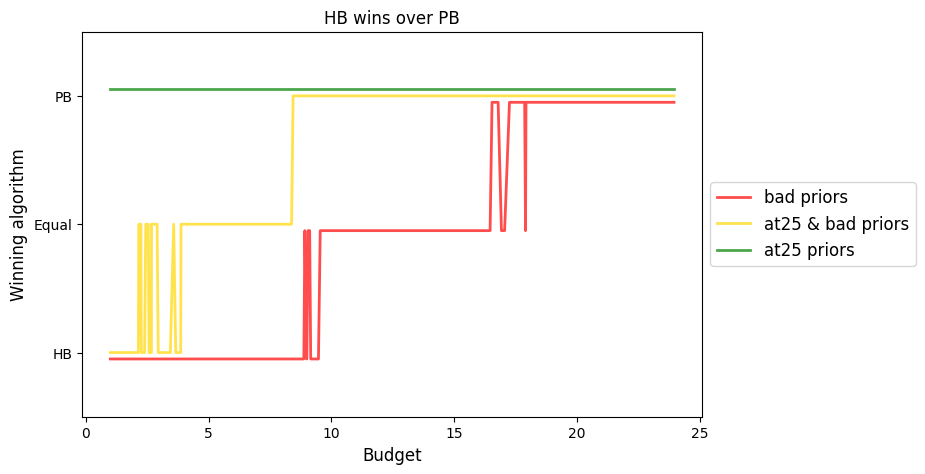

In [11]:

colors=["red","gold","green","orange","purple"]
fig=plt.figure(figsize=(8,5))
for p_n,priors in enumerate([["bad"],["at25","bad"],["at25"]]):#+[["medium"],["good"]]):
    overtaking = []
    recovering = []
    relation,budgets=relations[' '.join(priors)]
    for i in range(len(relation)-1):
        if relation[i] <1 and relation[i+1] == 1:
            overtaking.append(budgets[i+1])
        elif relation[i] == -1 and relation[i+1] == 0:
            recovering.append(budgets[i+1])
    if not overtaking:
        overtaking.append(1.0)
    if not recovering:
        recovering.append(1.0)
    print(f"Priors {' & '.join(priors)}")
    print(f"Overtaking points: {overtaking}")
    print(f"Reovery points: {recovering}\n")
    plt.plot(budgets, [x-0.05+p_n*0.05 for x in relation],color=colors[p_n],linewidth=2,label=f'{" & ".join(priors)} priors',alpha=0.7)
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           fancybox=True, shadow=False, ncol=1, prop={'size': 12})
plt.yticks([-1,0,1],labels=["HB","Equal","PB"])
plt.ylim(-1.5,1.5)
plt.xlabel('Budget',fontsize=12)
plt.ylabel('Winning algorithm',fontsize=12)
plt.title('HB wins over PB')
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/trend_analysis")
plt.show()
